LDA Test Accuracy: 0.7727
[[0.8828125  0.109375   0.0078125  0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.0375     0.95       0.         0.         0.         0.
  0.0125     0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.14444444 0.76666667 0.06666667 0.         0.
  0.01111111 0.         0.         0.         0.         0.01111111
  0.         0.         0.         0.         0.        ]
 [0.01265823 0.03797468 0.03797468 0.91139241 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.79310345 0.
  0.         0.         0.03448276 0.17241379 0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.82051282
  0.    

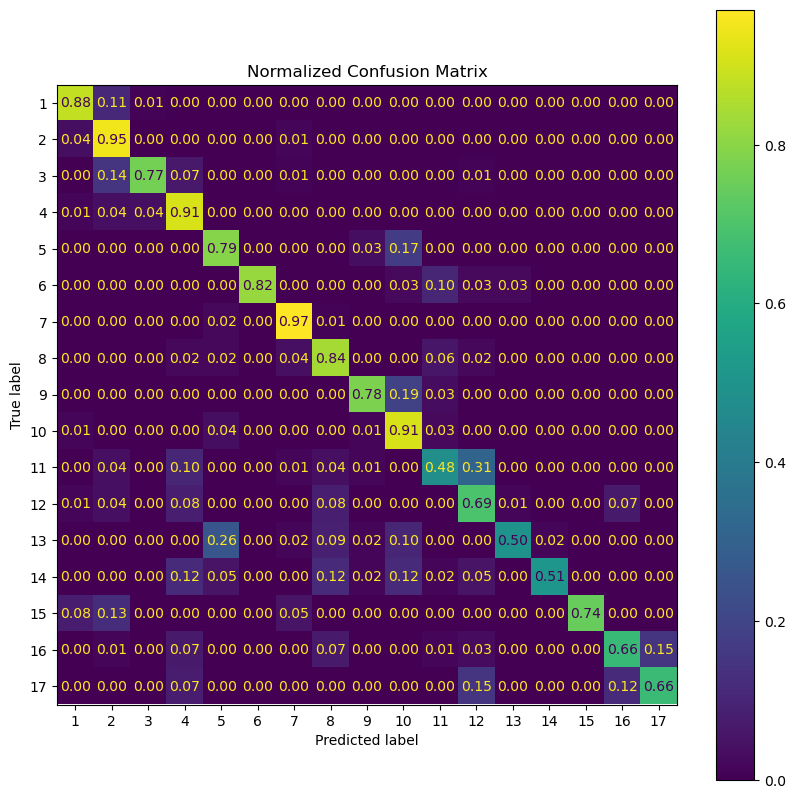

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
data=pd.read_csv('/Users/aidantang/Desktop/Gesture_recog/Feature_extract_data/feature_extracted_tdfd.csv')

data = data[data['Stimulus'] != 0]

# splitting into train/validation/test based on 'Repetition'
train_data = data[data['Repetition'].isin([1, 2, 3, 4])]
test_data  = data[data['Repetition'].isin([5,6])]

X_train = train_data.drop(columns=['Stimulus', 'Repetition'])
y_train = train_data['Stimulus']

X_test = test_data.drop(columns=['Stimulus', 'Repetition'])
y_test = test_data['Stimulus']

# Scale the features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test  = sc_X.transform(X_test)

# 2. Train an LDA model ----------------------------------------------------
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)


# 4. Test the model --------------------------------------------------------
y_pred = lda.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"LDA Test Accuracy: {test_accuracy:.4f}")
# Evaluate the model
cm = confusion_matrix(y_test, y_pred, normalize='true')
print(cm)

# Evaluate the model

cm = confusion_matrix(y_test, y_pred, normalize='true')
unique_labels = sorted(y_test.unique())

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(cmap='viridis', values_format=".2f", ax=ax)
plt.title('Normalized Confusion Matrix')
plt.show()